In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Define transformations
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 170498071/170498071 [00:04<00:00, 35127583.51it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [2]:
class CNN_MLP_Hybrid(nn.Module):
    def __init__(self):
        super(CNN_MLP_Hybrid, self).__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.flatten_dim = 128 * 8 * 8  # Flatten size after CNN layers
        self.mlp_layers = nn.Sequential(
            nn.Linear(self.flatten_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)  # 10 classes for CIFAR-10
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.mlp_layers(x)
        return x

# Instantiate model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_MLP_Hybrid().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/tmp/ipykernel_30/141829428.py:24: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()
/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 1/20
Training Loss: 1.1853, Validation Loss: 1.0214
Accuracy: 0.6388, Precision: 0.6392, Recall: 0.6388, F1 Score: 0.6315
Training Time: 10.36s, Memory Usage: 1205.94 MB
Confusion Matrix:
[[745  11  50   4  10   3  11   8 124  34]
 [ 69 691   7   1   4   4  25   2  41 156]
 [ 98   5 472  27 128  68 130  26  32  14]
 [ 39  10 107 327  71 170 178  35  31  32]
 [ 48   2  97  28 564  32 142  63  21   3]
 [ 23   5 104 126  67 521  75  52  13  14]
 [ 11   0  43  32  29   7 857   1  13   7]
 [ 32   2  44  31  99  73  18 673  10  18]
 [ 83  30  12   5   3   3   7   6 823  28]
 [ 67 114  14   5   6   4  14  14  47 715]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 2/20
Training Loss: 1.0503, Validation Loss: 0.9202
Accuracy: 0.6708, Precision: 0.6816, Recall: 0.6708, F1 Score: 0.6706
Training Time: 10.74s, Memory Usage: 1214.57 MB
Confusion Matrix:
[[735  34  69  25   8   4  12  10  76  27]
 [ 26 840  13  18   2   5  15   7  22  52]
 [ 75   6 531  73  77  73 118  30  11   6]
 [ 22   9  80 577  37 137 101  24   9   4]
 [ 29   3  87  88 523  40 137  78  15   0]
 [ 10   5  80 299  25 507  30  35   7   2]
 [  2   5  39  73  17  10 851   0   3   0]
 [ 16   4  56  67  44  76  13 720   2   2]
 [ 79  53  24  17   5   6  12   6 780  18]
 [ 47 183  17  34   4   7  12  21  31 644]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 3/20
Training Loss: 0.9608, Validation Loss: 0.8516
Accuracy: 0.7048, Precision: 0.7130, Recall: 0.7048, F1 Score: 0.7067
Training Time: 10.39s, Memory Usage: 1215.01 MB
Confusion Matrix:
[[738  17  59  29  29   7   5  12  64  40]
 [ 25 815   2  12   9   4   5   5  35  88]
 [ 70   4 522  69 151  91  39  37   8   9]
 [ 20   4  50 545  74 205  39  33  18  12]
 [ 16   2  55  66 735  37  21  55  11   2]
 [ 15   3  43 192  57 640  10  35   1   4]
 [  7   4  54  91  97  22 712   6   5   2]
 [ 12   2  26  43  88  79   2 736   6   6]
 [ 72  30  14  18   8   8   3   6 816  25]
 [ 29  84   6  23   8   7   6  17  31 789]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 4/20
Training Loss: 0.9028, Validation Loss: 0.8158
Accuracy: 0.7217, Precision: 0.7201, Recall: 0.7217, F1 Score: 0.7180
Training Time: 10.43s, Memory Usage: 1215.93 MB
Confusion Matrix:
[[744  36  42  13  26   2   8  18  53  58]
 [ 12 844   1   1   3   1   3   1  13 121]
 [ 71  10 561  26 134  55  68  42  13  20]
 [ 26  13  81 453  88 177  80  36  13  33]
 [ 13   4  52  27 755  23  30  76  13   7]
 [ 14   5  69 138  66 618  11  52   4  23]
 [  4   6  49  34  86  17 786   7   3   8]
 [ 20   3  29  25  57  47   3 792   2  22]
 [ 65  60  10  10  10   3   5   5 806  26]
 [ 16  71   4   5   4   2   3  11  26 858]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 5/20
Training Loss: 0.8599, Validation Loss: 0.7906
Accuracy: 0.7270, Precision: 0.7315, Recall: 0.7270, F1 Score: 0.7258
Training Time: 10.93s, Memory Usage: 1215.97 MB
Confusion Matrix:
[[813  35  22  13   9   5   5  16  33  49]
 [ 12 892   1   6   0   2   2   3   7  75]
 [107  15 531  57  70 101  53  46   6  14]
 [ 26  14  52 570  50 175  42  42   8  21]
 [ 36   8  56  50 640  58  24 120   7   1]
 [ 19   9  28 198  32 654   7  38   2  13]
 [  9   8  45  76  55  49 742   8   4   4]
 [ 22   6  18  32  22  68   3 823   2   4]
 [ 94  58   6  17   4   8   2   6 770  35]
 [ 23  98   3  10   0   2   3  10  16 835]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 6/20
Training Loss: 0.8174, Validation Loss: 0.7560
Accuracy: 0.7381, Precision: 0.7426, Recall: 0.7381, F1 Score: 0.7387
Training Time: 10.64s, Memory Usage: 1215.98 MB
Confusion Matrix:
[[784  21  42  16  18   6   6  12  50  45]
 [ 19 814   7  11   3   3   8   4  19 112]
 [ 69   2 630  37  88  50  91  15   4  14]
 [ 18   2  77 552  66 160  88  15  12  10]
 [ 18   1  52  60 744  29  59  30   6   1]
 [ 10   2  55 186  61 633  29  19   1   4]
 [  4   2  48  48  29  10 851   3   3   2]
 [  8   3  48  57  83  78   8 709   2   4]
 [ 67  23  16  18  11   5   6   3 826  25]
 [ 22  49   7  29   9   6   6   6  28 838]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 7/20
Training Loss: 0.7872, Validation Loss: 0.7390
Accuracy: 0.7430, Precision: 0.7479, Recall: 0.7430, F1 Score: 0.7407
Training Time: 10.60s, Memory Usage: 1216.00 MB
Confusion Matrix:
[[806  24  28  14  34   9   5  14  39  27]
 [ 13 871   0   5   2   4   2   3  14  86]
 [ 76  10 531  40 148  77  62  34  11  11]
 [ 19   9  48 476  94 239  57  33  13  12]
 [ 14   3  24  27 819  32  32  46   2   1]
 [ 11   5  23 117  74 718  12  33   4   3]
 [  5   6  38  53  60  26 802   4   4   2]
 [ 14   3  18  26  60  83   4 788   1   3]
 [ 73  45   7  12  28   5   4   5 794  27]
 [ 30  83   4  14   3   5   6  14  16 825]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 8/20
Training Loss: 0.7590, Validation Loss: 0.7490
Accuracy: 0.7412, Precision: 0.7548, Recall: 0.7412, F1 Score: 0.7417
Training Time: 10.94s, Memory Usage: 1216.00 MB
Confusion Matrix:
[[815  21  74   8  13   2   4   9  24  30]
 [ 23 873   3   5   1   1   4   4  13  73]
 [ 58   2 745  39  56  19  44  19   2  16]
 [ 14   4 135 587  66  74  67  30   7  16]
 [ 20   6 116  37 731  12  28  45   2   3]
 [ 17   2 127 231  62 484  20  46   4   7]
 [  5   3  97  45  34   7 801   5   1   2]
 [ 19   4  57  41  57  22   4 787   1   8]
 [138  27  31  13   9   1   2   1 752  26]
 [ 39  73  10   9   5   2   2   5  18 837]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 9/20
Training Loss: 0.7364, Validation Loss: 0.7458
Accuracy: 0.7446, Precision: 0.7518, Recall: 0.7446, F1 Score: 0.7446
Training Time: 10.68s, Memory Usage: 1216.01 MB
Confusion Matrix:
[[754   9  65  15  10   6   7   8  98  28]
 [ 23 843   7   6   1   4   7   4  58  47]
 [ 45   2 727  39  39  28  67  28  21   4]
 [ 16   7 104 541  28 174  78  31  17   4]
 [ 19   2 126  51 632  33  72  54  11   0]
 [ 14   3  75 160  33 652  19  39   3   2]
 [  4   3  74  38  12  16 846   4   2   1]
 [ 10   2  54  25  29  62   9 798   7   4]
 [ 37   6  18  18   3   5   3   1 903   6]
 [ 39  68  12  18   3   4  14  11  81 750]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 10/20
Training Loss: 0.7138, Validation Loss: 0.7092
Accuracy: 0.7516, Precision: 0.7589, Recall: 0.7516, F1 Score: 0.7495
Training Time: 10.56s, Memory Usage: 1216.01 MB
Confusion Matrix:
[[856  19  21   9  15   9   6  12  20  33]
 [ 20 906   4   7   1   4   4   2   5  47]
 [ 89   5 602  32  72  81  84  25   5   5]
 [ 27  10  55 459  47 287  86  19   4   6]
 [ 27   5  59  38 716  50  65  35   4   1]
 [ 17   2  26 108  41 757  23  21   2   3]
 [  8   6  31  29  17  28 876   2   1   2]
 [ 22   7  23  21  45 101   6 768   3   4]
 [107  56  10  12   8   7   5   2 770  23]
 [ 37 105   6  12   3   4   6   6  15 806]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 11/20
Training Loss: 0.7012, Validation Loss: 0.6958
Accuracy: 0.7610, Precision: 0.7591, Recall: 0.7610, F1 Score: 0.7585
Training Time: 11.09s, Memory Usage: 1216.06 MB
Confusion Matrix:
[[802  30  22  13  12   6   8  18  38  51]
 [ 11 881   1   6   1   3   4   4  16  73]
 [ 84   4 602  46  96  49  56  43   9  11]
 [ 16   7  55 514  55 215  63  39  19  17]
 [ 22   3  50  26 773  32  25  62   3   4]
 [ 18   3  42 131  53 694   9  42   4   4]
 [  6   4  39  49  52  20 817   6   2   5]
 [ 13   2  23  23  40  42   3 848   4   2]
 [ 75  37   6  12   9   2   5   8 824  22]
 [ 20  70   7   8   5   2   4  11  18 855]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 12/20
Training Loss: 0.6819, Validation Loss: 0.7013
Accuracy: 0.7570, Precision: 0.7638, Recall: 0.7570, F1 Score: 0.7566
Training Time: 10.43s, Memory Usage: 1216.10 MB
Confusion Matrix:
[[817  19  33  15  25   7   6   9  43  26]
 [ 11 916   1  10   1   5   5   4  14  33]
 [ 72   6 536  82  97  70  95  29   8   5]
 [ 18   8  28 639  51 153  66  21   8   8]
 [ 18   4  32  67 731  32  59  51   5   1]
 [ 14   2  17 180  52 688  18  23   2   4]
 [  4   4  22  69  23  16 855   4   3   0]
 [ 15   3  14  54  48  75   8 782   0   1]
 [ 61  35   9  16  14   7   7   2 836  13]
 [ 33 121   4  18   5   7  12   6  24 770]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 13/20
Training Loss: 0.6640, Validation Loss: 0.6787
Accuracy: 0.7698, Precision: 0.7715, Recall: 0.7698, F1 Score: 0.7696
Training Time: 10.34s, Memory Usage: 1216.10 MB
Confusion Matrix:
[[785  23  29  22  10   5   4   7  58  57]
 [  6 911   2   7   1   2   3   1  11  56]
 [ 59   4 705  42  49  39  63  14  11  14]
 [ 18   8  70 604  41 155  66  13  10  15]
 [ 19   7  94  63 683  33  45  44  10   2]
 [ 13   2  53 176  38 666  18  22   6   6]
 [  3   3  45  57  18  10 857   4   1   2]
 [ 23   6  39  49  48  57   4 761   2  11]
 [ 43  33  12  16   2   1   3   2 860  28]
 [ 12  87   7   8   1   2   4   1  12 866]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 14/20
Training Loss: 0.6513, Validation Loss: 0.6941
Accuracy: 0.7681, Precision: 0.7774, Recall: 0.7681, F1 Score: 0.7683
Training Time: 10.91s, Memory Usage: 1216.10 MB
Confusion Matrix:
[[802  14  26  20  32   7   5  12  47  35]
 [ 22 877   4   4   2   4   4   5  14  64]
 [ 58   3 584  49 152  78  40  18   8  10]
 [ 16   5  33 561  85 215  45  22   9   9]
 [ 13   3  19  18 863  35  14  29   4   2]
 [ 13   4  17 133  65 730   9  23   4   2]
 [  7   3  30  60  85  30 778   4   2   1]
 [ 10   3  17  30  69  74   4 783   4   6]
 [ 51  22   8  15  15   8   3   2 856  20]
 [ 36  61   4  11   4   7   4   6  20 847]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 15/20
Training Loss: 0.6390, Validation Loss: 0.6952
Accuracy: 0.7594, Precision: 0.7735, Recall: 0.7594, F1 Score: 0.7610
Training Time: 10.48s, Memory Usage: 1216.11 MB
Confusion Matrix:
[[737  18  36  22  31   6   3  14  85  48]
 [ 12 893   1  12   2   5   2   4  22  47]
 [ 55   7 625  79 130  36  37  14  11   6]
 [ 12   7  38 679  91  93  37  19  19   5]
 [ 11   3  25  53 849  13  10  31   5   0]
 [ 13   2  30 250  78 584   7  23   9   4]
 [  7   5  44  73  93  13 755   4   4   2]
 [  9   4  20  68  92  26   3 771   4   3]
 [ 35  17  15  17  11   3   2   1 884  15]
 [ 15  95   5  13  10   4   4   7  30 817]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 16/20
Training Loss: 0.6338, Validation Loss: 0.6830
Accuracy: 0.7656, Precision: 0.7720, Recall: 0.7656, F1 Score: 0.7653
Training Time: 10.54s, Memory Usage: 1216.11 MB
Confusion Matrix:
[[827  10  21  26   8   5   8   8  44  43]
 [ 20 818   4   9   1   5   6   2  29 106]
 [ 71   1 643  43  48  67 100  12   7   8]
 [ 22   2  51 558  29 218  85  13  12  10]
 [ 18   1  74  57 684  47  86  25   7   1]
 [ 14   1  29 141  30 743  23  13   4   2]
 [  5   2  27  33   8  18 900   2   4   1]
 [ 17   4  35  48  66  77  10 731   3   9]
 [ 65  10  10  11   4   4   8   2 861  25]
 [ 19  27   7  13   3   6  12   4  18 891]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 17/20
Training Loss: 0.6167, Validation Loss: 0.6541
Accuracy: 0.7744, Precision: 0.7750, Recall: 0.7744, F1 Score: 0.7734
Training Time: 11.00s, Memory Usage: 1216.11 MB
Confusion Matrix:
[[830  11  36  18   7   4   6  14  43  31]
 [ 18 871   2   5   0   3   4   6  13  78]
 [ 53   1 643  49  66  53  69  50   5  11]
 [ 18   6  45 604  37 166  60  44   8  12]
 [ 19   3  32  48 695  33  48 116   4   2]
 [ 10   2  34 166  41 678  12  45   5   7]
 [ 10   4  26  55  27  25 842   7   2   2]
 [  7   2  20  35  22  35   6 867   3   3]
 [ 70  27  11  12   4   2   3   6 849  16]
 [ 31  52   5   8   2   5   4   7  21 865]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 18/20
Training Loss: 0.6121, Validation Loss: 0.6668
Accuracy: 0.7751, Precision: 0.7752, Recall: 0.7751, F1 Score: 0.7725
Training Time: 10.58s, Memory Usage: 1216.11 MB
Confusion Matrix:
[[833  28  14  12  11   5   3  14  34  46]
 [ 10 932   1   2   0   2   3   4  10  36]
 [ 96   5 680  31  38  43  53  39   4  11]
 [ 30  16  48 519  46 215  71  33  12  10]
 [ 26   4 101  30 701  34  38  60   3   3]
 [ 17   9  35  99  39 734  15  43   2   7]
 [ 11   8  46  41  20  22 844   5   1   2]
 [ 19   4  21  17  29  44   4 858   0   4]
 [ 75  46   9   7   4   4   3   5 814  33]
 [ 14 104   5   6   1   7   4  10  13 836]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 19/20
Training Loss: 0.6010, Validation Loss: 0.6476
Accuracy: 0.7775, Precision: 0.7787, Recall: 0.7775, F1 Score: 0.7769
Training Time: 10.67s, Memory Usage: 1216.11 MB
Confusion Matrix:
[[798   6  79  12  18   2   6  19  42  18]
 [ 23 853   3   5   1   3   7   9  39  57]
 [ 39   0 723  32  68  30  57  42   4   5]
 [ 20   4  76 592  54 130  69  37  11   7]
 [ 11   3  73  28 771  16  43  52   3   0]
 [ 17   1  48 172  57 627  22  51   5   0]
 [  6   5  51  41  23  12 854   6   2   0]
 [  8   1  17  29  54  29   2 855   3   2]
 [ 52  11  13   8  13   2   6   7 881   7]
 [ 46  50   7  13   4   3   5  12  39 821]]



/tmp/ipykernel_30/141829428.py:39: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/141829428.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 20/20
Training Loss: 0.5911, Validation Loss: 0.6358
Accuracy: 0.7844, Precision: 0.7863, Recall: 0.7844, F1 Score: 0.7835
Training Time: 11.10s, Memory Usage: 1216.11 MB
Confusion Matrix:
[[812  15  40   9  16   6   2   6  57  37]
 [ 10 893   3   6   0   2   3   1  22  60]
 [ 53   2 696  33  72  60  46  23   9   6]
 [ 25   8  54 537  46 249  31  24  14  12]
 [ 25   4  50  30 781  37  28  36   5   4]
 [ 16   3  28  93  36 778  10  26   6   4]
 [ 11   6  47  57  40  34 798   2   3   2]
 [ 14   4  30  27  55  59   2 795   3  11]
 [ 41  21   9   9   5   5   3   3 890  14]
 [ 19  64   4   7   0   5   2   4  31 864]]



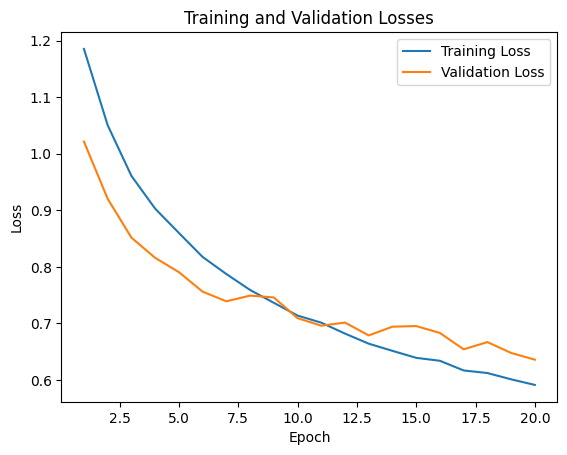

In [4]:
import time
import torch
import torch.cuda.amp as amp  # For mixed precision
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import psutil
import numpy as np

# Define directory to save checkpoints and metrics log
checkpoint_dir = '/kaggle/working/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
log_file = '/kaggle/working/metrics_log.txt'

# Use a larger batch size if GPU memory allows
batch_size = 128  # Adjust based on available memory
num_epochs = 20
train_losses, val_losses = [], []
metrics_log = []

# Define DataLoaders with optimized settings
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=4)

# Use mixed precision scaler for efficient memory usage
scaler = amp.GradScaler()

for epoch in range(num_epochs):
    # Track training start time
    start_time = time.time()
    
    # Training phase
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
        
        optimizer.zero_grad()
        
        # Mixed precision training
        with amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        train_loss += loss.item() * images.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            
            # Mixed precision inference
            with amp.autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)
            
            val_loss += loss.item() * images.size(0)

            # Collect predictions and labels for metrics
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    val_loss /= len(test_loader.dataset)
    val_losses.append(val_loss)

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    # Track training time and memory usage
    end_time = time.time()
    training_time = end_time - start_time
    memory_usage = psutil.Process().memory_info().rss / (1024 ** 2)  # in MB

    # Log metrics
    epoch_log = f'Epoch {epoch+1}/{num_epochs}\n' \
                f'Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}\n' \
                f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n' \
                f'Training Time: {training_time:.2f}s, Memory Usage: {memory_usage:.2f} MB\n' \
                f'Confusion Matrix:\n{conf_matrix}\n'

    print(epoch_log)
    metrics_log.append(epoch_log)

    # Save model checkpoint
    torch.save(model.state_dict(), os.path.join(checkpoint_dir, f"epoch_{epoch+1}.pt"))

# Save metrics to a .txt file after training
with open(log_file, 'w') as f:
    f.writelines(metrics_log)

# Plot training and validation loss curves
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


# Fine-tuning and changing hyperparameters of model

In [14]:
import time
import torch
import torch.nn as nn
import torch.cuda.amp as amp
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import psutil
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
import seaborn as sns

# Paths for checkpoints and metrics log
checkpoint_path = '/kaggle/working/model_checkpoint.pth'
metrics_log_file = '/kaggle/working/metrics_log.txt'

# Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# Increase batch size to maximize GPU utilization
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True, pin_memory=True, num_workers=8)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False, pin_memory=True, num_workers=8)

Files already downloaded and verified
Files already downloaded and verified


/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [21]:
import torch.nn as nn

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.cnn_layers = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        # Calculate the flattened size
        with torch.no_grad():
            sample_input = torch.randn(1, 3, 32, 32)
            flattened_size = self.cnn_layers(sample_input).view(1, -1).size(1)

        # MLP classifier after flattening
        self.mlp_layers = nn.Sequential(
            nn.Linear(flattened_size, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.mlp_layers(x)
        return x


/tmp/ipykernel_30/4076868060.py:7: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 1/50
Training Loss: 1.8986, Validation Loss: 1.5154
Accuracy: 0.4631, Precision: 0.4687, Recall: 0.4631, F1 Score: 0.4471
Training Time: 23.52s, Memory Usage: 1580.34 MB
Confusion Matrix:
[[260  79  59   5   7   6   7   6 502  69]
 [  2 801   1   6   3   1   2   2  41 141]
 [ 73  35 285  63 191 113  47  43 109  41]
 [ 25  40 164 169  89 255  64  44  73  77]
 [ 22  33 143  51 374  89  82 111  63  32]
 [ 18  31 137 112  62 464  12  67  53  44]
 [  2  21  82  75 199  51 454  24  19  73]
 [ 16  45  55  38  95  89  15 452  45 150]
 [ 40 121  17   2   2   3   1   1 766  47]
 [  1 290   6   8   4   2   7   6  70 606]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 2/50
Training Loss: 1.5001, Validation Loss: 1.5147
Accuracy: 0.4975, Precision: 0.5092, Recall: 0.4975, F1 Score: 0.4674
Training Time: 23.11s, Memory Usage: 1580.35 MB
Confusion Matrix:
[[396 176  16   1   1   6   3  24 222 155]
 [  1 798   0   1   1   1   1   3   8 186]
 [139  46 246  14 134  61  91 141  63  65]
 [ 15  51  73  69  49 214 113 158  46 212]
 [ 37  33  81   9 286  37  78 329  29  81]
 [  8  28  35  40  41 391  32 261  35 129]
 [ 10  20  33  18 101  28 606  64  11 109]
 [ 17  37   8   3  20  27  11 649  13 215]
 [ 39 134   3   0   1   2   0   6 712 103]
 [  5 144   0   0   1   0   1   3  24 822]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 3/50
Training Loss: 1.2703, Validation Loss: 1.2860
Accuracy: 0.5594, Precision: 0.6500, Recall: 0.5594, F1 Score: 0.5390
Training Time: 23.60s, Memory Usage: 1580.36 MB
Confusion Matrix:
[[711  44  91   0  17   1   0   4 129   3]
 [ 29 917   3   0  11   1   9   1  22   7]
 [113   6 650   3 172   3  22   4  27   0]
 [ 42   8 481  75 205  44  92  10  42   1]
 [ 17   3 198   1 719   1  10  39  12   0]
 [ 29   8 468  62 178 182  12  36  24   1]
 [ 15   5 159   3 232   0 576   0  10   0]
 [ 24   8 135   2 279   6   2 535   6   3]
 [ 74  41  30   0  10   0   3   0 840   2]
 [ 67 401  17   1  30   1  19  16  59 389]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 4/50
Training Loss: 1.1242, Validation Loss: 1.0029
Accuracy: 0.6567, Precision: 0.6731, Recall: 0.6567, F1 Score: 0.6324
Training Time: 23.53s, Memory Usage: 1580.36 MB
Confusion Matrix:
[[727  29  45   0  17   0   3  26 133  20]
 [ 14 939   0   0   4   0   4   7   6  26]
 [124   5 556   6 187  15  45  38  19   5]
 [ 24  22 201  82 250 129 146  92  39  15]
 [ 16   3  52   3 720   0  28 169   9   0]
 [ 21  13 142  32 179 397  41 159  10   6]
 [ 11  15  51   6 174   3 724   7   7   2]
 [ 19   3  31   1  88  16   5 829   0   8]
 [ 46  49   2   0  11   0   4   8 864  16]
 [ 50 156   4   0   7   1   8  19  26 729]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 5/50
Training Loss: 1.0009, Validation Loss: 0.8277
Accuracy: 0.7093, Precision: 0.7402, Recall: 0.7093, F1 Score: 0.7103
Training Time: 23.15s, Memory Usage: 1580.41 MB
Confusion Matrix:
[[774   9  84   4   2   0   1   7 103  16]
 [ 30 864   2   3   1   2   5   0  28  65]
 [ 79   2 770  50  50   8  11  10  14   6]
 [ 21   1 190 566  41  74  22  24  47  14]
 [ 43   1 176  55 615   3  14  75  15   3]
 [ 17   0 162 320  38 389   5  51  12   6]
 [  9   3 121 175  42   0 618  10  12  10]
 [ 35   2  97  28  32  35   1 752   8  10]
 [ 46  12   9   8   4   0   1   0 912   8]
 [ 52  45   9  10   1   0   0   7  43 833]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 6/50
Training Loss: 0.9283, Validation Loss: 0.7578
Accuracy: 0.7421, Precision: 0.7482, Recall: 0.7421, F1 Score: 0.7387
Training Time: 22.99s, Memory Usage: 1580.41 MB
Confusion Matrix:
[[597  51  73  17   9   8   5  11 160  69]
 [  0 948   0   2   2   2   2   0  14  30]
 [ 40  17 673  32  75  80  35  17  17  14]
 [  6  12  91 457  40 258  42  19  46  29]
 [  5   5  76  38 724  37  23  68  16   8]
 [  3   5  48 128  36 722  11  27   7  13]
 [  1  18  60  80  28  12 775   6  10  10]
 [  5  10  26   9  24 108   0 782   6  30]
 [ 14  26   7   7   3   2   2   0 921  18]
 [  5 136   2   6   0   2   6   3  18 822]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 7/50
Training Loss: 0.8559, Validation Loss: 0.7399
Accuracy: 0.7513, Precision: 0.7714, Recall: 0.7513, F1 Score: 0.7518
Training Time: 23.40s, Memory Usage: 1580.41 MB
Confusion Matrix:
[[706  38 115  19   5   6   5   3  86  17]
 [  2 959   2   2   0   2   4   0   9  20]
 [ 34   6 796  22  29  28  69   3   9   4]
 [  6   3 165 544  29  98 125   7  18   5]
 [ 13   6 168  45 612  11 118  19   8   0]
 [  4   1 111 207  34 582  43  14   2   2]
 [  2   7  59  31   3   3 891   0   3   1]
 [ 20   6  81  32  51  73  17 705   7   8]
 [ 27  21  22  12   1   0   7   0 906   4]
 [ 12 107  11  17   0   0   8   3  30 812]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 8/50
Training Loss: 0.8025, Validation Loss: 0.6568
Accuracy: 0.7762, Precision: 0.7828, Recall: 0.7762, F1 Score: 0.7750
Training Time: 23.34s, Memory Usage: 1580.46 MB
Confusion Matrix:
[[832  21  35   5   5   3   0   5  47  47]
 [  1 952   0   2   0   2   0   0   4  39]
 [ 76  11 727  26  43  59  33   7   6  12]
 [ 30   7  80 510  24 244  40  11  24  30]
 [ 22   6  79  59 690  53  42  31  11   7]
 [ 14   8  49  96  23 773   7  19   3   8]
 [  8  10  72  72   8  20 790   0  11   9]
 [ 22  14  33  17  25 129   4 728   2  26]
 [ 46  37   5  10   1   2   3   0 864  32]
 [ 16  69   3   3   0   1   0   0  12 896]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 9/50
Training Loss: 0.7576, Validation Loss: 0.5897
Accuracy: 0.7965, Precision: 0.8005, Recall: 0.7965, F1 Score: 0.7960
Training Time: 22.95s, Memory Usage: 1580.47 MB
Confusion Matrix:
[[824  19  28  13   9   7   3  24  56  17]
 [  0 944   1   2   1   3   3   4   6  36]
 [ 53   6 615  60  64  77  75  38   8   4]
 [ 11   4  38 664  21 161  55  30   7   9]
 [  8   6  32  89 702  40  57  60   4   2]
 [  5   2  22 172  23 725  11  38   0   2]
 [  5   6  20  61   7  16 876   5   1   3]
 [  5   1  15  15  15  71   2 868   3   5]
 [ 41  23   2  19   1   3   3   3 892  13]
 [ 24  77   2  10   0   4   2   7  19 855]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 10/50
Training Loss: 0.7201, Validation Loss: 0.7281
Accuracy: 0.7699, Precision: 0.7809, Recall: 0.7699, F1 Score: 0.7596
Training Time: 23.42s, Memory Usage: 1580.47 MB
Confusion Matrix:
[[871  39  11   1   2   0   0   5  49  22]
 [  2 975   1   0   0   0   0   0   1  21]
 [113  18 724   3  54  25  18  27   5  13]
 [ 62  50 139 323  59 167  52  62  23  63]
 [ 43   9  67   4 758   6  22  75   7   9]
 [ 27  16  92  41  35 655   9  91   6  28]
 [ 26  44  60   6  20  12 810   6   3  13]
 [ 40  14  30   1  12  13   1 861   2  26]
 [ 47  51   3   0   0   2   0   2 873  22]
 [ 20 117   2   0   0   0   0   1  11 849]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 11/50
Training Loss: 0.6855, Validation Loss: 0.5692
Accuracy: 0.8139, Precision: 0.8209, Recall: 0.8139, F1 Score: 0.8123
Training Time: 23.40s, Memory Usage: 1580.52 MB
Confusion Matrix:
[[882   9  21  12   3   1   6   6  30  30]
 [  6 910   0   1   1   0   4   1  18  59]
 [ 68   1 708  60  38  16  53  22  13  21]
 [ 15   1  33 713  31  45  82  26  19  35]
 [ 25   2  59  66 738   6  42  36  16  10]
 [  7   2  32 247  23 589  26  48   3  23]
 [  8   3  25  36   6   2 902   3   4  11]
 [ 16   3  13  32  19  12   7 862   5  31]
 [ 46  10   2   2   0   0   7   2 903  28]
 [ 21  23   3   4   0   0   1   1  15 932]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 12/50
Training Loss: 0.6652, Validation Loss: 0.6945
Accuracy: 0.7707, Precision: 0.7883, Recall: 0.7707, F1 Score: 0.7642
Training Time: 23.22s, Memory Usage: 1580.52 MB
Confusion Matrix:
[[940  29   3   0   9   0   2   1  15   1]
 [  2 982   0   1   1   0   2   0   2  10]
 [147  14 599  15  92  15  95   9   6   8]
 [ 59  31  43 491  94  47 158  23  32  22]
 [ 31   8  23  10 855   3  44  19   3   4]
 [ 37  30  47 156  70 533  61  49   5  12]
 [ 16  13  10  10  17   3 919   2   4   6]
 [ 72  22  11   8  47  14  12 804   2   8]
 [ 97  49   3   2   1   0   3   0 834  11]
 [ 58 179   0   0   0   0   3   1   9 750]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 13/50
Training Loss: 0.6435, Validation Loss: 0.5619
Accuracy: 0.8179, Precision: 0.8315, Recall: 0.8179, F1 Score: 0.8191
Training Time: 22.88s, Memory Usage: 1580.52 MB
Confusion Matrix:
[[955   2   1  11   5   1   1   2  20   2]
 [ 25 921   0   4   1   4   2   1  22  20]
 [140   1 640  51  62  52  48   3   2   1]
 [ 32   0  26 731  54 111  33   6   5   2]
 [ 30   0  34  33 844  17  25  15   0   2]
 [ 18   1  17 171  38 732   9  12   1   1]
 [ 14   3  12  57  21  18 872   1   1   1]
 [ 51   0  18  42  66  51   3 764   1   4]
 [ 66   5   5  23   2   3   2   0 892   2]
 [ 55  53   2  22   0   3   4   1  32 828]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 14/50
Training Loss: 0.6137, Validation Loss: 0.5040
Accuracy: 0.8320, Precision: 0.8302, Recall: 0.8320, F1 Score: 0.8294
Training Time: 23.56s, Memory Usage: 1580.52 MB
Confusion Matrix:
[[880  12   5   5   8   2   4  10  62  12]
 [  4 954   0   1   0   0   1   0  11  29]
 [ 95   3 746  26  46  28  17  25   7   7]
 [ 34  14  65 590  38 143  31  35  32  18]
 [ 14   3  52  31 793  20  11  64   7   5]
 [ 13   2  41 103  29 754   4  43   3   8]
 [  6   6  47  41  25  14 843   6   8   4]
 [ 11   2   9  10   7  28   0 922   2   9]
 [ 24   6   0   2   0   1   5   2 950  10]
 [ 21  61   2   2   0   2   1   3  20 888]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 15/50
Training Loss: 0.5958, Validation Loss: 0.5510
Accuracy: 0.8259, Precision: 0.8356, Recall: 0.8259, F1 Score: 0.8254
Training Time: 23.73s, Memory Usage: 1580.52 MB
Confusion Matrix:
[[835   6  26   9  50   1   1  27  26  19]
 [  5 879   2   1   2   2   3   5  12  89]
 [ 37   0 689  18 137  38  15  60   3   3]
 [  3   0  29 632 124 104  28  58   4  18]
 [  4   0  14  10 901  10   7  54   0   0]
 [  4   0  33 120  57 691  10  79   0   6]
 [  2   1  22  36  65  16 844  11   2   1]
 [  2   0   2   3  22  15   0 949   2   5]
 [ 38   5   7  10  13   1   0   9 893  24]
 [ 11  11   5   4   2   0   2  11   8 946]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 16/50
Training Loss: 0.5650, Validation Loss: 0.6199
Accuracy: 0.8033, Precision: 0.8145, Recall: 0.8033, F1 Score: 0.7992
Training Time: 22.91s, Memory Usage: 1580.52 MB
Confusion Matrix:
[[748  41  44   4   6   0   2   0 132  23]
 [  1 974   0   2   0   0   0   0   8  15]
 [ 32   3 839   8  32   7  56   0  18   5]
 [ 17  23 106 534  45  77 124   5  47  22]
 [  7   6  62   8 813   6  69  10  15   4]
 [  7  14 104 102  41 648  41  13  17  13]
 [  3  10  30   8   5   3 929   0  11   1]
 [ 20  15  69  24  62  26  15 722  19  28]
 [  6  13   2   0   0   0   5   0 967   7]
 [  5  98   1   0   0   1   2   0  34 859]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 17/50
Training Loss: 0.5469, Validation Loss: 0.5011
Accuracy: 0.8372, Precision: 0.8434, Recall: 0.8372, F1 Score: 0.8353
Training Time: 23.45s, Memory Usage: 1580.52 MB
Confusion Matrix:
[[892  22  18   8   5   2   0  15  27  11]
 [  1 975   1   1   1   2   0   2   2  15]
 [ 56   4 705  31  58  64  33  40   5   4]
 [ 13   9  30 580  34 248  26  40  14   6]
 [  7   2  26  24 805  47  18  66   5   0]
 [  4   4  18  45  17 866   2  37   2   5]
 [  7   9  12  38  21  32 861  11   5   4]
 [  5   0   4   6   8  35   0 937   1   4]
 [ 29  38   2   5   1   2   2   5 903  13]
 [ 17 106   3   4   0   2   0  10  10 848]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 18/50
Training Loss: 0.5371, Validation Loss: 0.5277
Accuracy: 0.8345, Precision: 0.8430, Recall: 0.8345, F1 Score: 0.8325
Training Time: 23.56s, Memory Usage: 1580.52 MB
Confusion Matrix:
[[796  10  46   2  13   0   1   3 109  20]
 [  2 914   1   0   0   1   0   0  24  58]
 [ 28   1 869   9  35   4  18   7  16  13]
 [ 15   6 122 609  45  64  29  22  52  36]
 [  6   1  67  13 841   6  16  34  12   4]
 [  7   2 115 116  33 641  13  39  15  19]
 [  7   3  49  18  14   6 869   2  19  13]
 [  9   4  36   7  29   5   0 892   6  12]
 [  7   2   3   0   3   0   3   0 972  10]
 [  8  19   2   1   0   0   0   2  26 942]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 19/50
Training Loss: 0.5091, Validation Loss: 0.4874
Accuracy: 0.8336, Precision: 0.8404, Recall: 0.8336, F1 Score: 0.8329
Training Time: 23.25s, Memory Usage: 1580.53 MB
Confusion Matrix:
[[900  28  24  12   6   1   1   5  19   4]
 [  1 985   0   0   0   1   0   1   2  10]
 [ 44   2 850  25  24  22  15  12   2   4]
 [ 20   9  76 602  24 205  24  21  10   9]
 [ 23   9  78  25 743  45  20  52   3   2]
 [ 11   3  41  85  12 812   4  32   0   0]
 [  4   8  54  36  14  25 850   4   3   2]
 [ 14   8  24  10   7  37   0 895   1   4]
 [ 53  68   9   5   0   2   2   0 850  11]
 [ 15 115   3   7   0   2   0   0   9 849]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 20/50
Training Loss: 0.5005, Validation Loss: 0.4844
Accuracy: 0.8428, Precision: 0.8557, Recall: 0.8428, F1 Score: 0.8447
Training Time: 22.87s, Memory Usage: 1580.53 MB
Confusion Matrix:
[[806  14  21  22  13   2   5   8  86  23]
 [  2 950   0   4   2   0   0   0  17  25]
 [ 32   1 713  91  84  34  12  20  10   3]
 [  7   2  15 814  41  74   9  21  14   3]
 [  4   1  12  50 882  16   7  21   7   0]
 [  2   1  13 190  33 734   1  22   3   1]
 [  2   2  17 123  33  19 787   5  10   2]
 [  7   2   4  31  42  27   1 881   1   4]
 [ 11   4   5  14   2   1   0   0 955   8]
 [  6  47   1  13   1   1   2   3  20 906]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 21/50
Training Loss: 0.4813, Validation Loss: 0.4772
Accuracy: 0.8492, Precision: 0.8540, Recall: 0.8492, F1 Score: 0.8486
Training Time: 23.25s, Memory Usage: 1580.53 MB
Confusion Matrix:
[[939   2  11   2   4   0   0   6  29   7]
 [ 18 882   1   2   2   1   1   0  19  74]
 [ 67   0 771  38  51  29   8  24   5   7]
 [ 30   1  42 731  49  70  14  31  20  12]
 [ 26   1  21  23 871   7   6  36   6   3]
 [ 16   1  27 158  33 697   5  48   9   6]
 [ 14   1  47  64  38   8 798   4  13  13]
 [ 27   0   7  19  16   8   0 918   2   3]
 [ 39   1   1   5   2   0   0   1 939  12]
 [ 23   8   0   4   0   1   0   3  15 946]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 22/50
Training Loss: 0.4721, Validation Loss: 0.4112
Accuracy: 0.8685, Precision: 0.8707, Recall: 0.8685, F1 Score: 0.8691
Training Time: 23.34s, Memory Usage: 1580.53 MB
Confusion Matrix:
[[886  10  44  12   9   2   2   2  25   8]
 [  6 939   1   2   1   2   0   0  12  37]
 [ 29   0 858  30  33  28  17   1   1   3]
 [ 10   2  46 747  41  97  36   6  11   4]
 [  3   1  64  26 844  16  24  19   3   0]
 [  3   0  36 130  27 781   7  13   0   3]
 [  4   2  32  38   9   8 903   1   2   1]
 [ 11   0  28  18  29  38   1 871   1   3]
 [ 29   5  13   5   1   0   4   0 930  13]
 [ 16  27   5   4   0   1   3   1  17 926]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 23/50
Training Loss: 0.4565, Validation Loss: 0.4642
Accuracy: 0.8499, Precision: 0.8567, Recall: 0.8499, F1 Score: 0.8482
Training Time: 23.10s, Memory Usage: 1580.53 MB
Confusion Matrix:
[[847   9  32   3   6   1   0  10  56  36]
 [  4 940   1   2   1   0   0   0  10  42]
 [ 30   1 881  16  26   5   8  18   6   9]
 [ 15   5 112 652  44  48  29  47  25  23]
 [ 10   1  61  12 807   5  14  77   7   6]
 [  8   3  92 119  33 664   3  65   4   9]
 [  4   3  83  21  10   3 855   4   8   9]
 [  4   2  19   3   8   6   0 949   1   8]
 [ 19   7   7   1   1   0   0   1 950  14]
 [  4  27   1   0   0   0   0   2  12 954]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 24/50
Training Loss: 0.4430, Validation Loss: 0.4216
Accuracy: 0.8633, Precision: 0.8669, Recall: 0.8633, F1 Score: 0.8631
Training Time: 23.22s, Memory Usage: 1580.53 MB
Confusion Matrix:
[[911   8   5  16   8   2   3   9  33   5]
 [  4 972   0   2   1   0   0   0   4  17]
 [ 79   3 724  61  39  41  10  34   3   6]
 [ 10   4  16 765  28 121  13  26   9   8]
 [ 10   2  21  35 848  20   9  45   8   2]
 [  5   1  11 121  13 805   3  33   1   7]
 [  6   8  20  62  17  24 843  11   4   5]
 [  5   1   5  11  13  21   1 936   0   7]
 [ 23  20   2   6   0   1   1   1 938   8]
 [ 18  72   0   3   0   1   0   2  13 891]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 25/50
Training Loss: 0.4345, Validation Loss: 0.3925
Accuracy: 0.8749, Precision: 0.8743, Recall: 0.8749, F1 Score: 0.8730
Training Time: 23.25s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[913  13  23   2  13   1   2   6  20   7]
 [  5 968   1   1   0   0   0   1   5  19]
 [ 37   1 840  14  45  17  16  22   4   4]
 [ 22   9  63 649  53 110  41  27  16  10]
 [ 11   2  25  10 902   7  15  24   3   1]
 [  7   6  31  79  27 799   7  34   3   7]
 [  7   7  24  12  20   9 907   5   4   5]
 [  6   2   9   7  24  19   0 926   1   6]
 [ 28  19   5   2   0   0   3   1 929  13]
 [ 12  57   2   2   0   1   0   1   9 916]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 26/50
Training Loss: 0.4184, Validation Loss: 0.4063
Accuracy: 0.8720, Precision: 0.8733, Recall: 0.8720, F1 Score: 0.8708
Training Time: 23.25s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[925   7  34   0  10   1   2   8  11   2]
 [  6 969   2   2   1   0   0   1   3  16]
 [ 27   1 865  16  36  12  16  23   2   2]
 [ 20   3  61 705  41  71  42  44   8   5]
 [  8   3  40  11 859  10  23  44   1   1]
 [ 10   2  31 136  20 722  10  67   1   1]
 [  4   3  37  18   9   1 920   4   2   2]
 [ 10   1   9   5  15   6   1 949   1   3]
 [ 46  14   8   6   0   0   2   2 909  13]
 [ 21  55   4   4   0   1   3   6   9 897]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 27/50
Training Loss: 0.4050, Validation Loss: 0.4501
Accuracy: 0.8553, Precision: 0.8624, Recall: 0.8553, F1 Score: 0.8556
Training Time: 22.87s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[912   3  25   8   5   2   0  19  12  14]
 [ 12 881   2   3   1   2   0   1   6  92]
 [ 39   0 754  47  43  52  17  43   1   4]
 [ 16   0  15 726  33 147  13  38   4   8]
 [ 10   1  15  30 777  36  13 116   1   1]
 [  2   0  10  85   6 839   4  50   1   3]
 [  8   1  13  56  13  32 861   8   1   7]
 [  6   0   3   6   7  20   0 956   1   1]
 [ 59   7   8  12   1   2   0   5 880  26]
 [ 13  10   0   2   0   1   1   4   2 967]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 28/50
Training Loss: 0.3917, Validation Loss: 0.3958
Accuracy: 0.8736, Precision: 0.8769, Recall: 0.8736, F1 Score: 0.8734
Training Time: 23.63s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[910  11  42   4   4   0   3   4  16   6]
 [  4 969   1   1   1   0   0   0   2  22]
 [ 27   0 898  20  20  10  18   3   1   3]
 [ 14   1  89 708  38  76  46  10   8  10]
 [  6   1  71  12 869   6  17  11   3   4]
 [  7   2  50 117  33 755  15  13   0   8]
 [  1   1  39  21   6   3 923   1   2   3]
 [ 11   3  30  14  42  15   1 878   0   6]
 [ 36  18  13   5   0   0   4   0 913  11]
 [ 15  56   2   2   0   1   2   0   9 913]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 29/50
Training Loss: 0.3859, Validation Loss: 0.3852
Accuracy: 0.8785, Precision: 0.8799, Recall: 0.8785, F1 Score: 0.8782
Training Time: 23.59s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[870  12  37  16  13   1   2  14  11  24]
 [  3 954   0   3   1   0   0   1   4  34]
 [ 20   0 811  42  57  17  20  25   3   5]
 [  5   1  20 775  47  73  35  30   5   9]
 [  3   1  22  17 882   8  15  44   1   7]
 [  3   2  24 130  19 776  11  29   0   6]
 [  2   3  15  30  13   3 924   4   1   5]
 [  4   0   2  13  14  13   0 948   1   5]
 [ 39  17   5  10   2   0   4   2 888  33]
 [  7  24   1   5   0   1   0   2   3 957]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 30/50
Training Loss: 0.3670, Validation Loss: 0.3776
Accuracy: 0.8798, Precision: 0.8810, Recall: 0.8798, F1 Score: 0.8788
Training Time: 23.17s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[887   8  42   6  15   1   3   5  23  10]
 [  7 955   2   1   1   0   3   0   8  23]
 [ 19   0 890  16  40   9  12   9   4   1]
 [ 12   1  87 690  58  82  34  20   8   8]
 [  3   1  26   6 922   6  12  20   2   2]
 [  3   1  48 113  30 754  13  34   2   2]
 [  3   2  38  20  15   6 912   1   2   1]
 [  6   0  16   8  31  10   0 924   1   4]
 [ 28   7   8   3   2   0   2   1 940   9]
 [ 11  43   4   1   0   1   1   1  14 924]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 31/50
Training Loss: 0.3620, Validation Loss: 0.3690
Accuracy: 0.8822, Precision: 0.8867, Recall: 0.8822, F1 Score: 0.8830
Training Time: 23.16s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[876   7  17  20   8   1   4   5  57   5]
 [  1 963   1   4   1   0   0   0   9  21]
 [ 27   1 819  54  38  21  19  14   5   2]
 [  6   2  20 832  25  67  17  13  12   6]
 [  7   1  21  38 884  13  11  19   6   0]
 [  1   2  13 172  16 762   6  21   4   3]
 [  4   3  13  66   9  14 883   3   4   1]
 [  7   2   7  20  20  22   0 919   1   2]
 [ 13   3   3   4   0   0   3   1 965   8]
 [  9  39   3   6   0   2   1   1  20 919]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 32/50
Training Loss: 0.3540, Validation Loss: 0.3828
Accuracy: 0.8782, Precision: 0.8795, Recall: 0.8782, F1 Score: 0.8762
Training Time: 23.62s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[920  10  22   0   3   1   4  10  27   3]
 [  3 978   0   1   0   1   0   0   4  13]
 [ 30   2 842  14  23  29  32  21   5   2]
 [ 15   7  34 646  33 153  59  36  13   4]
 [ 15   2  44  12 826  17  20  62   2   0]
 [  5   5  24  54  14 836  17  39   3   3]
 [  2   4  16  16   6  12 937   5   1   1]
 [  6   3   5   3   6  15   2 956   1   3]
 [ 22  15   3   1   0   0   6   0 948   5]
 [ 19  65   1   1   0   1   3   2  15 893]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 33/50
Training Loss: 0.3413, Validation Loss: 0.3672
Accuracy: 0.8841, Precision: 0.8854, Recall: 0.8841, F1 Score: 0.8833
Training Time: 23.69s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[910   6  26   1   3   1   1   5  35  12]
 [  4 945   1   2   1   0   0   0   9  38]
 [ 28   1 888  15  19  24  11   7   4   3]
 [ 12   2  67 684  34 134  31  11  12  13]
 [ 12   1  69  10 845  17  11  29   4   2]
 [  4   2  41  67  12 837   8  20   4   5]
 [  4   4  36  19  11  15 907   0   2   2]
 [ 10   2  13  11  18  23   0 917   1   5]
 [ 15   5   5   3   0   0   1   0 957  14]
 [  8  24   1   1   0   1   0   1  13 951]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 34/50
Training Loss: 0.3308, Validation Loss: 0.3735
Accuracy: 0.8846, Precision: 0.8862, Recall: 0.8846, F1 Score: 0.8846
Training Time: 23.14s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[911   8  33  11  10   1   4   5  16   1]
 [  4 976   2   2   2   0   0   0   4  10]
 [ 26   0 829  34  57  19  21   9   3   2]
 [ 11   1  36 771  47  82  30  14   6   2]
 [  4   1  20  17 922   9  10  15   2   0]
 [  4   1  17 126  24 795   9  22   0   2]
 [  3   2  19  34  15  10 915   1   0   1]
 [  5   1   9  16  34  17   1 917   0   0]
 [ 27  12   2   9   3   1   4   0 937   5]
 [ 22  71   4   7   1   1   2   5  14 873]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 35/50
Training Loss: 0.3194, Validation Loss: 0.3469
Accuracy: 0.8960, Precision: 0.8959, Recall: 0.8960, F1 Score: 0.8956
Training Time: 23.92s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[889   9  26  20  11   1   7   3  22  12]
 [  3 966   2   2   1   0   1   0   3  22]
 [ 24   0 850  24  44  24  23   6   2   3]
 [  7   2  36 754  48  95  34  12   6   6]
 [  5   2  15  11 929  10  11  16   1   0]
 [  3   0  21  91  24 827  13  17   0   4]
 [  2   2  19  18   8   9 941   0   0   1]
 [  4   0  11  13  24  21   2 919   0   6]
 [ 18  12   5   6   2   2   3   0 941  11]
 [  8  28   3   3   0   1   0   2  11 944]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 36/50
Training Loss: 0.3154, Validation Loss: 0.3607
Accuracy: 0.8881, Precision: 0.8908, Recall: 0.8881, F1 Score: 0.8887
Training Time: 23.58s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[886   6  24  18   6   1   4   1  37  17]
 [  4 951   2   3   0   0   1   0   8  31]
 [ 23   2 868  38  22  15  21   4   5   2]
 [  7   0  36 819  17  70  32   6   8   5]
 [  6   1  43  48 841  17  14  26   4   0]
 [  2   1  27 140  10 791  11  14   2   2]
 [  2   3  21  33   5   7 927   0   1   1]
 [  4   1   7  29  18  32   1 899   1   8]
 [ 14   4   3   5   0   0   4   0 957  13]
 [  9  26   4   5   0   1   0   1  12 942]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 37/50
Training Loss: 0.3055, Validation Loss: 0.3494
Accuracy: 0.8927, Precision: 0.8940, Recall: 0.8927, F1 Score: 0.8931
Training Time: 23.46s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[930   7  22  12   3   1   3   1  15   6]
 [  7 951   1   2   1   0   0   0   6  32]
 [ 28   0 879  29  24  19  14   3   3   1]
 [ 15   0  37 774  25 104  23   9   7   6]
 [ 11   1  40  27 871  20  11  14   3   2]
 [  4   0  22 102  12 836   7  12   1   4]
 [  8   2  24  39   8  16 902   0   0   1]
 [ 10   1  11  18  18  33   1 903   1   4]
 [ 27   6   6   5   0   1   2   1 942  10]
 [ 16  26   3   3   0   1   1   0  11 939]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 38/50
Training Loss: 0.2980, Validation Loss: 0.3621
Accuracy: 0.8911, Precision: 0.8912, Recall: 0.8911, F1 Score: 0.8898
Training Time: 23.07s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[944   5  16   0   7   1   1   4  19   3]
 [  7 957   2   1   0   0   0   1   6  26]
 [ 36   1 841  22  37  23  18  11   6   5]
 [ 16   1  41 682  41 142  35  20  13   9]
 [ 13   1  26   8 887  15  10  38   1   1]
 [  8   0  18  54  16 862   9  27   3   3]
 [  9   3  19  15  10  14 921   3   2   4]
 [ 10   0   6   7  13  19   1 938   0   6]
 [ 29   5   4   2   0   0   2   1 949   8]
 [ 16  30   3   3   0   0   0   3  15 930]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 39/50
Training Loss: 0.2852, Validation Loss: 0.3460
Accuracy: 0.8942, Precision: 0.8943, Recall: 0.8942, F1 Score: 0.8939
Training Time: 23.42s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[941   7  17   6   4   1   5   5  11   3]
 [  6 970   2   2   0   0   0   1   4  15]
 [ 28   1 837  32  38  21  28   9   4   2]
 [ 13   1  30 778  30  79  44  12   6   7]
 [ 12   1  20  19 885  15  18  29   1   0]
 [  8   1  17 121  10 809  14  18   1   1]
 [  5   3  18  21   7   6 938   0   0   2]
 [  6   0   4  13  14  24   1 934   1   3]
 [ 36  14   5   3   1   0   5   0 926  10]
 [ 19  39   2   3   0   1   1   2   9 924]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 40/50
Training Loss: 0.2832, Validation Loss: 0.3432
Accuracy: 0.8962, Precision: 0.8973, Recall: 0.8962, F1 Score: 0.8960
Training Time: 23.36s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[950   3  18   4   6   1   1   1  13   3]
 [  6 965   2   2   1   0   0   0   4  20]
 [ 29   0 872  30  31  11  16   6   3   2]
 [ 14   0  38 800  35  55  31  15   8   4]
 [ 15   1  30  16 895   9  10  21   2   1]
 [  7   1  22 143  14 772  14  23   1   3]
 [  7   2  21  28   9   5 924   1   2   1]
 [ 11   0   7  14  17  14   1 931   1   4]
 [ 36   7   6   4   0   0   2   1 937   7]
 [ 21  38   3   4   0   1   0   2  15 916]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 41/50
Training Loss: 0.2815, Validation Loss: 0.3441
Accuracy: 0.8984, Precision: 0.8991, Recall: 0.8984, F1 Score: 0.8986
Training Time: 23.08s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[912   7  22  13   7   1   5   3  17  13]
 [  4 953   1   3   0   0   0   1   4  34]
 [ 25   1 832  42  39  25  23   6   4   3]
 [  5   0  23 800  34  91  27   9   7   4]
 [  7   1  20  24 898  17  11  18   3   1]
 [  4   1  16  87  11 850  10  16   1   4]
 [  5   2  14  33   9  13 921   0   0   3]
 [  7   0   5  19  18  29   1 916   1   4]
 [ 25   6   4   4   0   0   3   0 945  13]
 [ 12  16   0   4   0   1   0   0  10 957]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 42/50
Training Loss: 0.2705, Validation Loss: 0.3411
Accuracy: 0.8996, Precision: 0.8993, Recall: 0.8996, F1 Score: 0.8993
Training Time: 23.19s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[909   9  31  11   7   1   6   5  15   6]
 [  5 971   1   2   0   0   0   1   3  17]
 [ 20   1 865  33  30  16  23   6   4   2]
 [  6   2  37 774  33  83  39  14   6   6]
 [  7   1  24  15 900  10  17  25   1   0]
 [  2   2  22  98  16 824  11  21   1   3]
 [  0   3  19  20   7   7 943   0   0   1]
 [  5   0   6  13  14  20   1 937   1   3]
 [ 25  12   6   3   1   0   4   0 937  12]
 [ 13  31   3   2   0   1   2   2  10 936]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 43/50
Training Loss: 0.2650, Validation Loss: 0.3418
Accuracy: 0.8994, Precision: 0.8996, Recall: 0.8994, F1 Score: 0.8993
Training Time: 23.60s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[909   9  21  13   8   1   4   3  22  10]
 [  5 969   2   2   0   0   0   0   4  18]
 [ 25   1 865  34  30  22  15   3   3   2]
 [  5   1  36 768  29 118  19  12   8   4]
 [  7   1  23  24 898  13  10  20   3   1]
 [  4   2  21  76  10 858   8  17   1   3]
 [  6   3  22  25   6  11 923   0   2   2]
 [  8   1   6  13  19  30   1 918   1   3]
 [ 22   7   5   3   0   0   1   1 951  10]
 [  7  39   2   2   0   1   0   2  12 935]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 44/50
Training Loss: 0.2661, Validation Loss: 0.3388
Accuracy: 0.9008, Precision: 0.9007, Recall: 0.9008, F1 Score: 0.9006
Training Time: 23.38s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[932   8  17  10   5   1   4   3  12   8]
 [  5 972   2   1   0   0   0   0   4  16]
 [ 28   1 860  29  32  16  20   7   4   3]
 [ 10   1  34 792  35  79  26  12   6   5]
 [ 12   1  21  16 908   9  11  20   1   1]
 [  6   1  21 102  15 818  12  20   1   4]
 [  5   3  19  29   9   7 927   0   0   1]
 [  8   2   6  17  21  19   1 919   1   6]
 [ 23  14   4   3   2   0   1   0 941  12]
 [  8  33   3   2   0   1   0   1  13 939]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 45/50
Training Loss: 0.2597, Validation Loss: 0.3374
Accuracy: 0.9017, Precision: 0.9015, Recall: 0.9017, F1 Score: 0.9016
Training Time: 22.84s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[916   9  23  11   6   1   4   4  17   9]
 [  4 966   2   3   0   0   0   0   4  21]
 [ 26   1 863  32  31  13  21   7   3   3]
 [  9   0  30 788  38  84  28  11   7   5]
 [  9   1  22  16 903  15  10  21   2   1]
 [  3   2  17 103  14 829   9  18   1   4]
 [  6   3  19  24   8  10 926   0   1   3]
 [  6   0   6  16  15  19   1 932   1   4]
 [ 20   9   4   4   2   0   1   1 949  10]
 [  9  27   3   3   0   1   0   1  11 945]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 46/50
Training Loss: 0.2592, Validation Loss: 0.3377
Accuracy: 0.8996, Precision: 0.8995, Recall: 0.8996, F1 Score: 0.8994
Training Time: 23.37s, Memory Usage: 1580.54 MB
Confusion Matrix:
[[930   8  23   9   6   1   3   3  12   5]
 [  5 966   2   2   1   0   0   0   4  20]
 [ 28   1 865  29  26  16  23   6   3   3]
 [ 10   0  38 768  34 100  29  11   6   4]
 [ 11   1  29  16 898  12  12  18   2   1]
 [  5   1  21  91  13 839  11  16   1   2]
 [  6   3  18  26   8  10 927   0   1   1]
 [  8   0   8  15  16  21   1 926   1   4]
 [ 26   9   5   4   1   0   2   1 941  11]
 [ 16  28   2   4   0   1   0   2  11 936]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 47/50
Training Loss: 0.2562, Validation Loss: 0.3422
Accuracy: 0.9025, Precision: 0.9024, Recall: 0.9025, F1 Score: 0.9023
Training Time: 23.55s, Memory Usage: 1580.55 MB
Confusion Matrix:
[[926   7  23   8   6   1   3   3  17   6]
 [  6 954   2   2   0   0   0   1   5  30]
 [ 28   1 878  29  26  12  12   8   3   3]
 [ 12   0  40 778  32  89  25  13   7   4]
 [ 11   1  31  13 905  10   9  17   2   1]
 [  7   1  26  87  12 835   9  18   1   4]
 [  6   3  26  25   9   8 920   0   2   1]
 [  8   0   8  16  16  17   1 929   1   4]
 [ 22   4   5   3   0   0   1   1 954  10]
 [ 13  21   3   3   0   1   0   2  11 946]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 48/50
Training Loss: 0.2531, Validation Loss: 0.3389
Accuracy: 0.9009, Precision: 0.9008, Recall: 0.9009, F1 Score: 0.9007
Training Time: 23.29s, Memory Usage: 1580.55 MB
Confusion Matrix:
[[921   8  24  11   7   1   3   4  14   7]
 [  5 966   2   2   0   0   0   0   4  21]
 [ 25   1 864  29  32  13  20   9   5   2]
 [  9   0  35 789  36  84  22  14   7   4]
 [  8   1  26  17 905  11   9  19   3   1]
 [  4   2  23 103  12 820  10  22   1   3]
 [  6   3  19  26  10   6 927   1   1   1]
 [  7   0   7  18  16  15   1 931   1   4]
 [ 21   8   5   2   0   0   2   1 951  10]
 [ 17  26   2   4   0   1   0   2  13 935]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 49/50
Training Loss: 0.2503, Validation Loss: 0.3373
Accuracy: 0.9004, Precision: 0.8998, Recall: 0.9004, F1 Score: 0.9000
Training Time: 22.86s, Memory Usage: 1580.55 MB
Confusion Matrix:
[[923   8  21  10   6   1   3   5  15   8]
 [  5 963   1   2   0   0   0   0   4  25]
 [ 25   1 865  28  27  18  21   7   5   3]
 [ 11   2  33 767  34  96  32  15   6   4]
 [ 11   1  29  15 891  11  12  26   3   1]
 [  5   2  22  84  12 837  10  23   1   4]
 [  6   3  19  20   9   9 932   0   1   1]
 [  6   0   5  11  13  20   1 940   1   3]
 [ 23   9   6   4   0   0   1   1 945  11]
 [ 13  27   2   3   0   1   0   2  11 941]]



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/tmp/ipykernel_30/4076868060.py:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/tmp/ipykernel_30/4076868060.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 50/50
Training Loss: 0.2475, Validation Loss: 0.3351
Accuracy: 0.9014, Precision: 0.9013, Recall: 0.9014, F1 Score: 0.9013
Training Time: 23.31s, Memory Usage: 1580.55 MB
Confusion Matrix:
[[922   8  20  12   7   1   3   4  18   5]
 [  5 965   2   2   1   0   0   0   5  20]
 [ 26   1 865  30  31  16  19   7   3   2]
 [  7   0  33 789  39  84  26  11   7   4]
 [  8   1  25  16 912  10  10  15   3   0]
 [  4   1  19  98  12 828  11  22   1   4]
 [  5   3  21  25   9   9 926   0   1   1]
 [  7   0   5  14  21  18   1 929   1   4]
 [ 19   7   5   4   3   0   2   1 950   9]
 [ 15  33   3   3   0   1   0   2  15 928]]



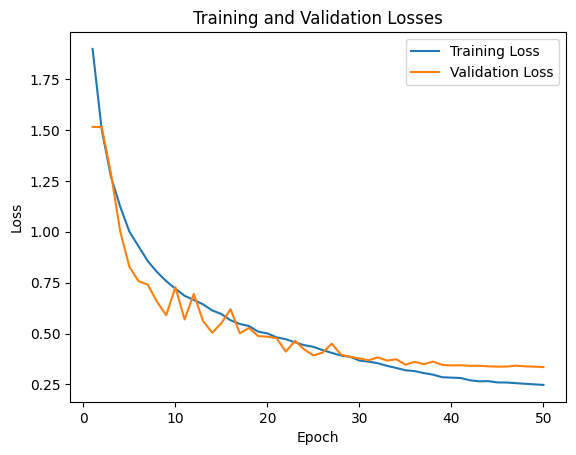

In [23]:
# Instantiate model, loss function, optimizer, and scheduler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0003)
scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-5)
scaler = amp.GradScaler()

# Training settings
num_epochs = 50
train_losses, val_losses = [], []
metrics_log = []

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
        
        optimizer.zero_grad()
        with amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        train_loss += loss.item() * images.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            with amp.autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    val_loss /= len(test_loader.dataset)
    val_losses.append(val_loss)

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    # Track training time and memory usage
    end_time = time.time()
    training_time = end_time - start_time
    memory_usage = psutil.Process().memory_info().rss / (1024 ** 2)

    # Log metrics
    epoch_log = f'Epoch {epoch+1}/{num_epochs}\n' \
                f'Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}\n' \
                f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n' \
                f'Training Time: {training_time:.2f}s, Memory Usage: {memory_usage:.2f} MB\n' \
                f'Confusion Matrix:\n{conf_matrix}\n'
    print(epoch_log)
    metrics_log.append(epoch_log)

    # Save and overwrite entire model checkpoint
    torch.save(model, checkpoint_path)

    # Step the scheduler
    scheduler.step()

# Save metrics to a .txt file after training
with open(metrics_log_file, 'w') as f:
    f.writelines(metrics_log)

# Plot training and validation loss curves
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


Files already downloaded and verified


/tmp/ipykernel_30/3258913903.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('/kaggle/working/model_checkpoint.pth')
/opt/conda/lib/python3.10/site-p

Classification Report:
               precision    recall  f1-score   support

       plane       1.00      1.00      1.00         2
         car       0.00      0.00      0.00         1
        bird       1.00      1.00      1.00         1
         cat       0.67      0.67      0.67         3
        deer       0.86      1.00      0.92         6
         dog       1.00      0.80      0.89         5
        frog       1.00      1.00      1.00         5
       horse       1.00      1.00      1.00         6
        ship       1.00      1.00      1.00         2
       truck       0.50      1.00      0.67         1

    accuracy                           0.91        32
   macro avg       0.80      0.85      0.81        32
weighted avg       0.90      0.91      0.90        32



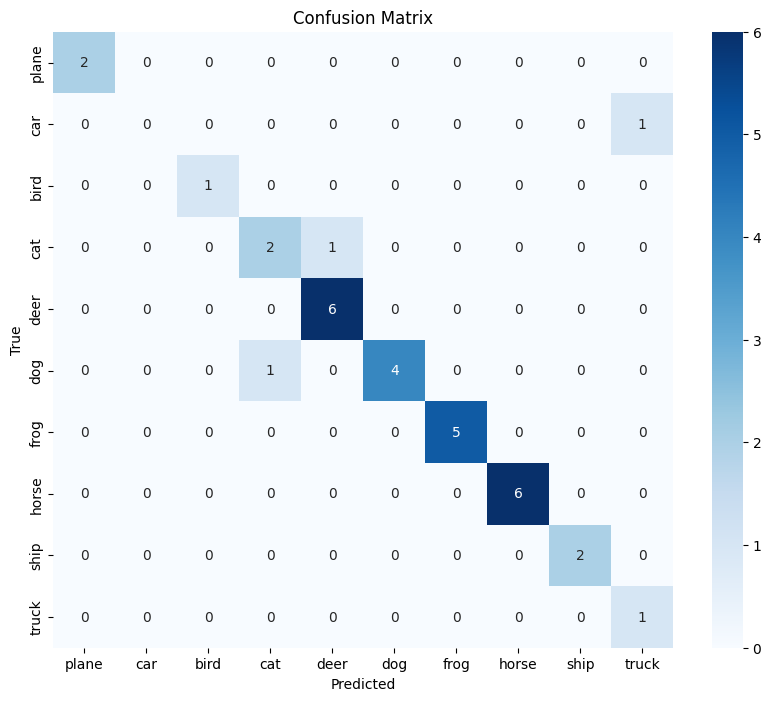

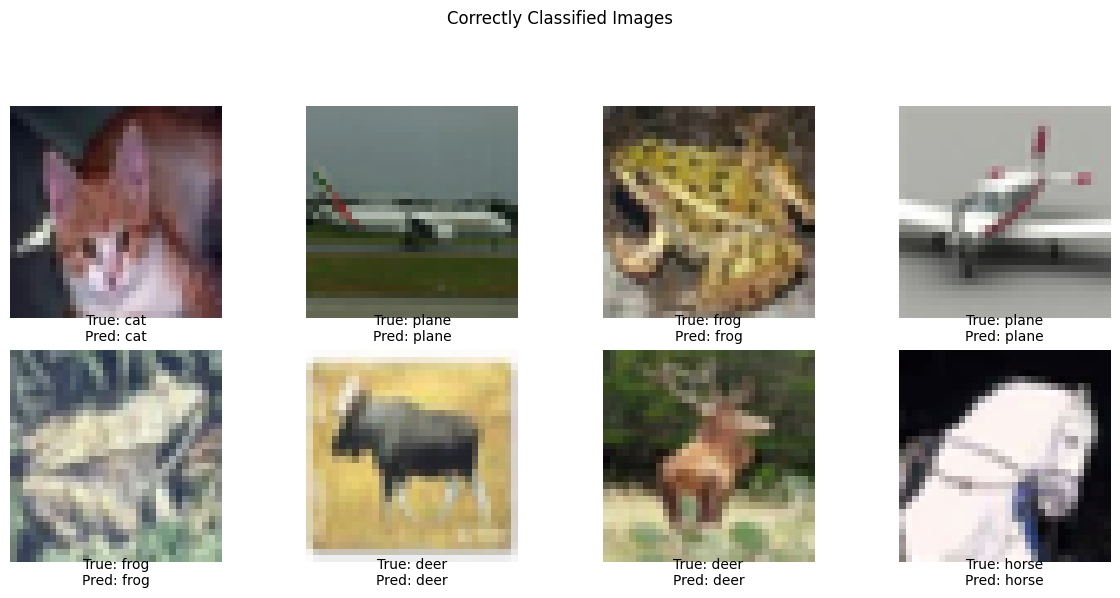

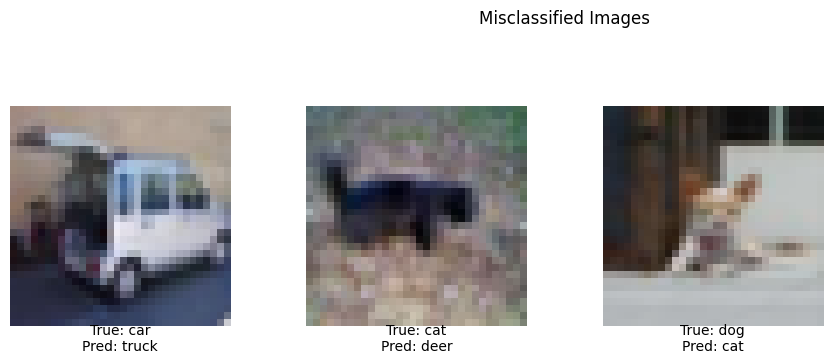

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Define the CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Load the test dataset
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=4)

# Load the saved model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load('/kaggle/working/model_checkpoint.pth')
model = model.to(device)
model.eval()

# Evaluate the model on a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Make predictions
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

# Convert predictions and labels to CPU for further analysis
labels_np = labels.cpu().numpy()
preds_np = preds.cpu().numpy()

# Classification report
print("Classification Report:\n", classification_report(labels_np, preds_np, target_names=classes))

# Confusion matrix
conf_matrix = confusion_matrix(labels_np, preds_np)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Separate correctly and incorrectly classified samples
correct_indices = np.where(preds_np == labels_np)[0]
incorrect_indices = np.where(preds_np != labels_np)[0]

# Visualization function
def show_images(images, labels, preds, indices, title):
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(indices[:8]):  # Display up to 8 images
        img = images[idx].cpu().numpy().transpose((1, 2, 0))
        img = (img * np.array([0.2023, 0.1994, 0.2010])) + np.array([0.4914, 0.4822, 0.4465])  # Unnormalize
        img = np.clip(img, 0, 1)  # Ensure image pixel values are in range [0,1]
        
        plt.subplot(2, 4, i + 1)
        plt.imshow(img)
        plt.title(f"True: {classes[labels[idx]]}\nPred: {classes[preds[idx]]}", fontsize=10, y=-0.15)
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

# Display correct and incorrect predictions
show_images(images, labels_np, preds_np, correct_indices, "Correctly Classified Images")
show_images(images, labels_np, preds_np, incorrect_indices, "Misclassified Images")
